# Iris Dataset

## Introduction

The Iris flower data set or Fisher's Iris data (also called Anderson's Iris data set) set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems". The data set consists of 3 species of Iris plants (Setosa, Versicolor and Virginica). Edgar Anderson collected 50 samples of the flower, of which each was a different species. He collected 150 in total. For each sample he measured the sepal length and width, and the petal length and width along with the corresponding species. The data contains the sepal length and width, and the petal length and width. Picture of an Iris which is a flower.

## Analysis

I have created 2 python files. the first one goes through the library sklear which is a library called Scikitlearn.
I take a look at various features of the dataset using numpy and pandas. I then creat 5 histograms. The second file
performs a matrix operation called a transformation on the numpy array of the features.

## Histograms

I added 5 histograms to the project using Matloplib.  Sepal length, sepal width, petal lenght, petal width and one that is just the targets (species). The targets have a one to one relation because there are 50 samples for each species.

## References

https://www.w3schools.com/python/numpy_intro.asp
https://www.w3schools.com/python/pandas/default.asp
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
https://www.ntirawen.com/2018/09/iris-dataset-prediction-in-machine.html
http://seaborn.pydata.org/generated/seaborn.FacetGrid.html
https://sklearn.org/

## Training a machine model with scikit-learn

This is what the data looks like in comma separated variables (CSV) format. For example, this first row indicates that Anderson found... This particular Iris was the species Setosa. The dataset also contains Iris measurements from the species Versicolor, and the species Virginica. In 1936, Sir Ronald Fisher wrote a paper about the Iris dataset, specifically about how a technique called **Linear Discriminant Analysis** could be used to accurately distinguish the three species from one another using only the sepal and petal measurements. In other words, Fisher framed this as a supervised learning problem in which we are attempting to predict the species of the given Iris using the available data. This is supervised learning, because we are trying to learn the relationship between the data namely the iris measurements and the outcome, which is the species of Iris. If this was unlabelled data, meaning that we only had the measurements and not the species, we might frame this as unsupervised learning by attempting to cluster the samples into meaningful groups. The Iris dataset has become a famous dataset for machine learning, because it turns out to be an easy supervised learning task. There is a strong relationship between the measurements and the species, and thus various machine learning models can accurately predict the species given the measurements. The dataset is described in more depth in the UCI Machine Learning Repository, which is a repository of hundreds of datasets that are suitable for machine learning tasks. Because the Iris dataset is so popular as a **toy dataset**, it has been built into the **scikit-learn library.** In this project I load the Iris data from scikit-learn and examine it so that I can use a machine learning model to predict species using the iris measurements.

I started by writing:

In [2]:
from sklearn.datasets import load_iris

This imports the load_iris function from the sklearn.datasets module. This is because the convention in scikit-learn is to import individual modules, classes or functions instead of importing scikit-learn as a whole.  I then ran the load_iris function and saved the return value in an object called iris.

In [3]:
iris = load_iris()
type(iris)

sklearn.utils.Bunch

This object is a special container called a "bunch", which is sci-kit learn's special object type for storing datasets and their attributes. One of those attributes is called "data". This is the same data we saw previously from the csv file with four rows and 150 columns. Each row represents one flower, and the four columns represent the four measurements (petal length, petal width, sepal length and sepal width).

In [4]:
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

I'm now going to introduce some important machine learning terminology that I'll be using throughout this project. Each row is know as an observation. Some equivalent terms are sample, example, instance and record. We can say that the Iris dataset has 150 observations. Each column is know as a feature. Some equivalent terms are predictor, attribute, independent variable, input, regressor and covariated. We can say that the Iris dataset has 4 features. In my analysis program, I printed out an attribute of the iris object called `feature_names`.

In [5]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


This represents the names of the four features. They can also be imagined as the column headers for the data. I also printed out two more attributes called `target` and `target_names`. 

In [6]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


The target represents what I am going to predict. A zero represents Setosa, a one represents Versicolor and a two represents Virginica. Some equivalent terms for target are **response**, outcome, outcome, label, dependent variable. I will use the term response throughout this project.

The last pieces of terminology that will be used are the two types of supervised learning, which are **classification** and **regression**. A classification problem is one in which the response being predicted is categorical, meaning that its values are in a **finite**, **unordered set**. Predicting the species of Iris is an example of a classification problem, as is predicting if an email is spam or not. In contrast, a regression problem is one in which the response being predicted is **ordered** and **continuous**, such as the price of a house or the height of a person. When looking at `iris.target`, we might wonder how we can tell that this is a classification problem and not a regression problem, since all we can see are the numbers 0, 1 and 2. The answer is that we cannot tell the difference. As we explore the problem, we have to understand how the data is encoded and decide whether the response variable is suited for **classification** or **regression**. In this case we know that the numbers 0, 1 and 2 represent unordered categories, and thus we know to use classification techniques and not regression techniques in order to solve this problem.

The first step in machine learning is for the model to learn the relationship between the **features** and the **response**. Firstly, we need to make sure that the features and response are in the form that scikit-learn expects. There are four key requirements to keep in mind which are as follows:

1. Scikit-learn expects the **features** and the **response** to be passed into the machine learning model as separate objects. `iris.data` and `iris.target` satisfy this condition since they are stored separately.
2. Scikit-learn only expects to see numbers in the **features** and **response** objects. This is why `iris.target` is stored as zero's, one's and two's instead  of the strings setosa, versicolor and virginica. In scikit-learn, the response object should always be numeric regardless of whether it is a regression problem or a classification problem.
3. Scikit-learn expects the **features** and the **response** to be stored as **NumPy** arrays. NumPy is a library for scientific computing that implements a homogenous, multidimensional array knows as an ndarray that has been optimised for fast computation. Both `iris.data` and `iris.target` are already stored as ndarrays. 
4. The feature and response objects are expected to have certain shapes. Specifically, the feature obkect should have two dimensions in which the first dimension represented by rows is the number of observations, and the second dimension, represented by columns is the number of features. All NumPy arrays have a shape attribute and so we can verify that the shape of `iris.data` is 150x4. The response object is expected to have a single dimension, and that dimension should have the same magnitude as the first dimension of the feature object. In other words, there should be one response corresponding to each observation. We can verify that the shape of `iris.target` is simply 150. 

In [8]:
print(type(iris.data))
print(type(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [9]:
print(iris.data.shape)

(150, 4)


In [10]:
print(iris.target.shape)

(150,)


I have now verified that `iris.data` and `iris.target` meet scikit-learn's four requirements for feature and response objects. The scikit-learn convention is for the feature data to be stored in an object named 'X', and for the response data to be stored in an object named 'y'. We'll store `iris.data` in 'X' and `iris.target` in 'y'. The 'X' is capitalised because it represents a matrix and the 'y' is lower case because it represents a vector. 

In [11]:
X = iris.data

y = iris.target

Before I go any further into machine learning and how we can train it to choose the correct species, let's discuss how we as humans would approach this task. Specifiacally, how would we prdict the species of an unknow Iris if we knew the measurements. When looking at the data, we would notice that the three Iris species in the dataset appear to have somewhat dissimilar measurements. If that was the case, we would hypothesise that the species of an unknown Iris could be predicted by looking for Irises in the data with similar measurements and assuming that the unknown Iris is the same species as those similar Irises. The process I just described is similar to how the K-nearest neighbours classification model works. The steps of K-nearest neighbours, or KNN, are as follows. First we pick a value for K such as 5. I'll discuss later how to choose this value. Second, the model searches for the 5 observations in the training data that are nearest to the measurements of the unknown Iris. In other words, the model calculates the numerical distance between the unknown Iris and each of the 150 known Irises and selects the 5 known Irises with the smallest distance to the unknown Iris. The **euclidean distance** (the length of a line segment between the two points), is often used as the disntance metric, but other metrics can be used instead. Third, the response values of the 5 nearest neighbours are computed, and whichever response value is the most popular is used as the predicted response value for the unknown Iris. Let's look at some visualisations.

## Example training data

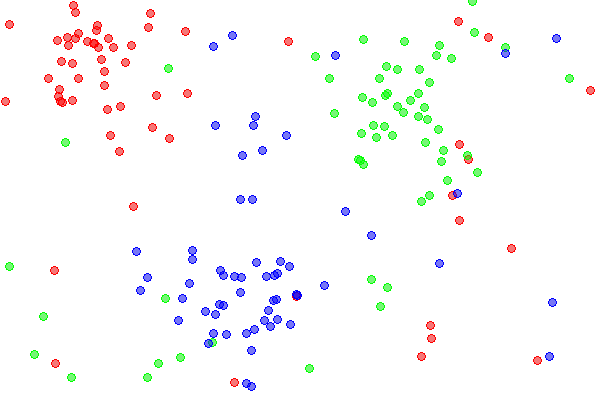

The above example training data. This is not the Iris dataset. This dataset has two numerical features represented by the X and Y coordinates. Each point represents an observation, and the colour of the point represents it's response class.

## KNN classification map (K=1)

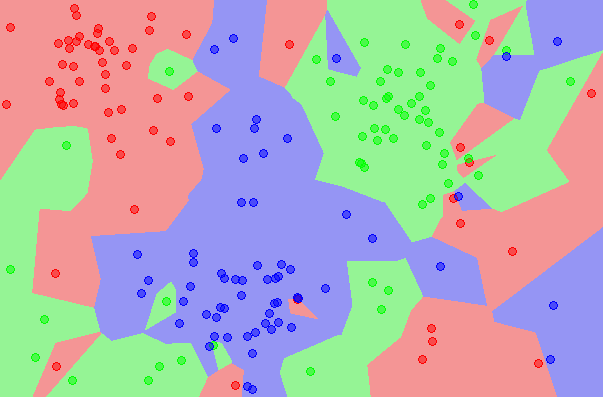

Next, we have a KNN classification map in which the K value is one. The backgound of the diagram has been coloured red for all areas in which all the nearest neighbours are red, coloured blue for all areas in which all the nearest neighbours are blue and coloured green for all areas in which all the nearest neighbours are green. The background colour tells us what the predicted response value would be for a new observation depending on it's X and Y features. 

## KNN classification map (K=5)

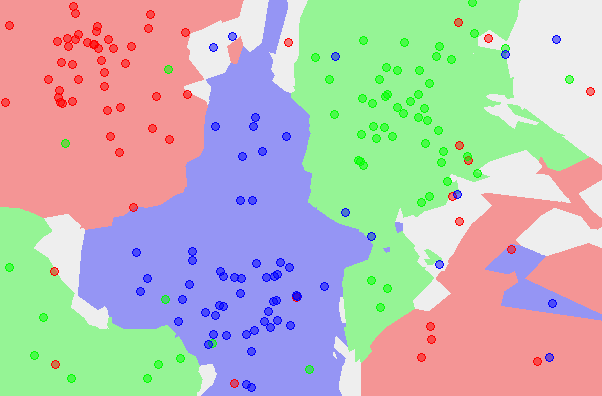

The third image is an image of a KNN classification map in which the K value is 5. We can see that the boundaries between colours, known as **decision boundaires** have changed, because more neighbours are taken into account when making predictions. The white ares are areas in which KNN can't make a clear decision because there is a "tie" between two classes. KNN is a simple machine learning model, but it can make highly accurate predictions if the different classes in the dataset have varied dissimilar feature values.

In [12]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


We can see above that 'X' is a 2-dimensional array with 150 rows and 4 columns as expected and 'y' is a 1-dimensional array with length 150 since there is one response value for each observation.

## Scikit-learn 4-step modeling pattern

**Step 1:** Import the class you plan to use.

This is the actual machine learning process. Scikit-learn provides a uniform interface to machine learing models, and there is a common pattern that can be reused across different models. The first step in this pattern is to import the relevant class. In this case we use:

In [13]:
from sklearn.neighbors import KNeighborsClassifier

**Step 2:** "Instantiate" the "estimator".

Scikit-learn referes to its models as "estimators" because their primary role is to estimate unknows quantities. This process is called "instantiation" because we are creating an instance of the KNeighborsClassifier class.

In [14]:
knn = KNeighborsClassifier(n_neighbors=1)

We have now created an instance of the KNeighborsClassifier class and called it knn. We now have an object called knn that knows how to do K-nearest neighbours classification, and it's just waiting for us to give us some data. There are three important notes about instantiating the estimator: The Name of the object does not matter. In this case I just called in KNN. Second, We need to tell the knn object that when it runs the K-nearest neighbours algorithm it should be looking for one nearest neighbour. Here, I specified the argument n=1. N Neighbours is knows as a tuning parameter or a "hyperparameter". Third, there are other parameters that I did not specify a value and thus all of those parameters are set to their default values. We can see the default values for all of those parameters by printing out the estimator object.

In [15]:
print(knn)

KNeighborsClassifier(n_neighbors=1)


**Step 3:** Fit the model with data (aka "model training")

This is the model training step in which the model learns the relationship betweeen the features and the response. The underlying mathematical process through which this learning occurs varies by model. We use the **"fit method"** on the knn object, and pass through two arguments. The feature matrix "X" and the response vector "y".

In [16]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

This operation occurs in place, which is why we don't need to need to assign the results to another object.

**Step 4:** Predict the response for a new observation.

This is the final step and it is to make predictions for new observations. We will input the measurements for an unknown Iris and ask the fitted model to predict the Iris species based on what it has learned in the previous step. We'll use the **predict method** on the knn object and pass through the features of the unknows Iris as a python list. It will be expecting a **NumPy array**, but it will still worj with a list since NumPy will automatically convert it to an array of the appropriate shape.

In [17]:
knn.predict([[3, 5, 4, 2]])

array([2])

Unlike the **fit method**, the predict method does return an object namely a NumPy array with the predicted response value. In this case, the K-Nearest Neighbours algorithm using K=1 predicts a response value of 2. Scikit-learn doesn't know what this 2 represents, so we need to keep track of the fact 2 was the encoding for Virginica, and this Virginica is the predicted species for the unknown Iris. As you might expect, this predict method can be used on multiple observations at once. In this case, I'm going to create a list of lists called called `X_new` which contains 2 new observations. When we pass `X_new` through the predict method, it again gets converted to a NumPy array but this time with a shape of (2, 4) which is interpreted as 2 observations with 4 features each.

In [18]:
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
knn.predict(X_new)

array([2, 1])

The predict method returns a NumPy array with values 2 and 1, which means that the prediction for the first unknown Iris was a 2 and the prediction for the second unknows Iris was a 1.

## Using a different value for K

If we wanted to try a different value for K such as 5. This is known as **model tuning**, in which we are varying the arguments that we pass through the model. Note that we don't have to import the class again, we just instantiate the model with the arguemtn `n_neighbors=5`, fit the model with the data and make predictions. This time, the model predicts the value 1 for both unknows Irises. 

In [19]:
# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X, y)

# predict the response for new observations
knn.predict(X_new)

array([1, 1])

A great thing about Scikit-learn is that it's models have a uniform interface which means that we can use the same 4 step pattern on a different model with reletive ease. For example, we might want to try **logistic regression**, which, despite its name, is another model used for **classification**. We simply import `logisticRegression` from the `linear_model` module, **instantiate** the model with all of the default parameters, **fit** the model with data, and make predictions.

In [20]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(solver='liblinear')

# fit the model with data
logreg.fit(X, y)

# predict the response for new observations
logreg.predict(X_new)

array([2, 0])

This time, the model has predicted a value of 2 for the first unknown Iris, and a value of 0 for the second unknown Iris. So which model produced the correct predictions for these 2 unknown Irises? The answer is that we don't know because these are out of sample observations, meaning that we don't know the true response values. As I said earlier, our goal with supervised learning is to build models that generalise to new data. However, we often aren't able to truly measure how well our models will perform on out of sample data. Does that mean that we are forced to just guess how well our models are likely to do? The answe to this is no.